In [1]:
import numpy as np
from pprint import pprint

import os
from pathlib import Path
from dwsimopt.utils import PATH2DWSIMOPT

dir_path = str(Path(os.getcwd()).parent.absolute())
print(dir_path)

import sys
sys.path.append(dir_path)
if 'dwsimopt.sim_opt' in sys.modules:  # Is the module in the register?
    del sys.modules['dwsimopt.sim_opt']  # If so, remove it.
    del SimulationOptimization
from dwsimopt.sim_opt import SimulationOptimization

c:\Users\lfsfr\Desktop\DwsimOpt.jl\examples


In [3]:
# Getting DWSIM path from system path
for k,v in enumerate(os.environ['path'].split(';')):
    if v.find('\DWSIM')>-1:
        path2dwsim = os.path.join(v, '')
if path2dwsim == None:
    path2dwsim = "C:\\Users\\lfsfr\\AppData\\Local\\DWSIM731\\"   #insert manuall
path2dwsim = "C:\\Users\\lfsfr\\AppData\\Local\\DWSIM731\\"   #insert manuall
print(path2dwsim)

# Loading DWSIM simulation into Python (Simulation object)
sim = SimulationOptimization(dof=np.array([]), path2sim= os.path.join(dir_path, "PRICO\\PRICO.dwxmz"), 
                     path2dwsim = path2dwsim, savepath = os.path.join(dir_path, "PRICO\\PRICO2.dwxmz"))
sim.add_refs()

# Instanciate automation manager object
from DWSIM.Automation import Automation2
if ('interf' not in locals()):    # create automation manager
    interf = Automation2()

# Connect simulation in sim.path2sim
sim.connect(interf)

C:\Users\lfsfr\AppData\Local\DWSIM731\
added refs
Simulation was loaded successfully


In [4]:
from dwsimopt.py2dwsim import * 

# Assign DoF:
create_pddx( ["MR-1", "CompoundMassFlow", "Nitrogen", "kg/s"],    sim, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Methane", "kg/s"],     sim, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Ethane", "kg/s"],      sim, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Propane", "kg/s"],     sim, element="dof" )
create_pddx( ["VALV-01", "OutletPressure", "Mixture", "Pa"],      sim, element="dof" )
create_pddx( ["COMP-4", "OutletPressure", "Mixture", "Pa"],       sim, element="dof" )

# Assign F
create_pddx( ["Sum_W", "EnergyFlow", "Mixture", "kW"], sim, element="fobj" )

# adding constraints (g_i <= 0):
g1 = create_pddx( ["MITA1-Calc", "OutputVariable", "mita", "°C"], sim, element="constraint", assign=False )
assign_pddx( lambda: 3-g1[0]() , ["MITA1-Calc", "OutputVariable", "mita", "°C"], sim, element="constraint" )
create_pddx( ["MSTR-27", "MassFraction", "Liquid", "x"], sim, element="constraint" )
create_pddx( ["MR-1", "MassFraction", "Liquid", "x"], sim, element="constraint" )
create_pddx( ["MSTR-03", "MassFraction", "Liquid", "x"], sim, element="constraint" )
create_pddx( ["MSTR-05", "MassFraction", "Liquid", "x"], sim, element="constraint" )


pprint(vars(sim))

{'dof': array([[<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CB820>,
        'MR-1', 'CompoundMassFlow', 'Nitrogen', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CB940>,
        'MR-1', 'CompoundMassFlow', 'Methane', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CBDC0>,
        'MR-1', 'CompoundMassFlow', 'Ethane', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CBE50>,
        'MR-1', 'CompoundMassFlow', 'Propane', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CBEE0>,
        'VALV-01', 'OutletPressure', 'Mixture', 'Pa'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CBF70>,
        'COMP-4', 'OutletPressure', 'Mixture', 'Pa']], dtype=object),
 'f': array([<function _fromDwsim.<locals>.<lambda> at 0x000001AAA5251040>,
       'Sum_W', 'EnergyFlow', 'Mixture', 'kW'], dtype=object),
 'f_val': array([], dtype=float64),
 'flowsheet': <DWSIM.UI.Desktop.Shared.Flowsheet objec

In [5]:
# Initial simulation optimization setup
# Initial guess of optimization
x0 = np.array( [0.269/3600, 0.529/3600, 0.619/3600, 2.847/3600, 2.3e5, 48.00e5] )

# Testing for simulation at x0
sim.calculate_optProblem(1.0*x0)
print(sim.x_val,
      sim.f_val,
      sim.g_val)

# Test saving simulation at x0 in 'savepath'
sim.interface.SaveFlowsheet(sim.flowsheet,sim.savepath,True)

# Inspecting simulation object
pprint(vars(sim))

opt_functions calculation at x = [7.47222222e-05 1.46944444e-04 1.71944444e-04 7.90833333e-04
 2.30000000e+05 4.80000000e+06]
f = [0.46905591], g = [2.28770066 0.         0.         0.         0.        ] at x = [7.47222222e-05 1.46944444e-04 1.71944444e-04 7.90833333e-04
 2.30000000e+05 4.80000000e+06]
[7.47222222e-05 1.46944444e-04 1.71944444e-04 7.90833333e-04
 2.30000000e+05 4.80000000e+06] [0.46905591] [2.28770066 0.         0.         0.         0.        ]
{'dof': array([[<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CB820>,
        'MR-1', 'CompoundMassFlow', 'Nitrogen', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CB940>,
        'MR-1', 'CompoundMassFlow', 'Methane', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CBDC0>,
        'MR-1', 'CompoundMassFlow', 'Ethane', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001AAA50CBE50>,
        'MR-1', 'CompoundMassFlow', 'Propane', 'kg/s'],
       [<function _toDws

In [6]:
# Setup for optimization
# convergence tolerances
xtol=0.01
ftol=0.01
maxiter=5 # +- 20 seconds per iteration

# decision variables bounds
bounds_raw = np.array( [0.5*np.asarray(x0), 1.5*np.asarray(x0)] )   # 50 % around base case

# regularizer calculation
regularizer = np.zeros(x0.size)
import math
for i in range(len(regularizer)):
    regularizer[i] = 10**(-1*math.floor(math.log(x0[i],10))) # regularizer for magnitude order of 1e0

# bounds regularized
bounds_reg = regularizer*bounds_raw
# bounds = optimize.Bounds(bounds_reg[0], bounds_reg[1])

# objective and constraints lambda definitions
f = lambda x: sim.calculate_optProblem(np.asarray(x)/regularizer)[0:sim.n_f]
g = lambda x: sim.calculate_optProblem(np.asarray(x)/regularizer)[sim.n_f:(sim.n_f+sim.n_g)]
# nonlinear_constraint = optimize.NonlinearConstraint(g, -np.inf, 0, jac='2-point', hess=optimize.BFGS())

In [7]:
# Global optimization with PSO
from sko.PSO import PSO

# f_pen = lambda x: fpen_barrier(sim,x/regularizer)
result_pso = PSO(func= lambda x: sim.fpen_barrier(x/regularizer), n_dim=sim.n_dof, pop=2*sim.n_dof, max_iter=100, lb=bounds_reg[0], ub=bounds_reg[1], verbose=True)
result_pso.record_mode = True
if sim.n_f > 1:
    print("Multi-objective optimization not supported (yet)")
elif sim.n_f < 1:
    print("Invalid number of objective functions")
else:
    print("Starting global optimization")
    result_pso.run()

opt_functions calculation at x = [4.52256505e-05 1.16471683e-04 2.26857610e-04 5.95274874e-04
 1.35017342e+05 3.05496343e+06]
f = [0.55275544], g = [86.95723407  0.          0.          0.          0.        ] at x = [4.52256505e-05 1.16471683e-04 2.26857610e-04 5.95274874e-04
 1.35017342e+05 3.05496343e+06]
opt_functions calculation at x = [1.06485272e-04 1.73088389e-04 1.95705937e-04 9.40021450e-04
 1.31838935e+05 7.10347078e+06]
f = [0.84627343], g = [-3.44510393  0.          0.          0.          0.        ] at x = [1.06485272e-04 1.73088389e-04 1.95705937e-04 9.40021450e-04
 1.31838935e+05 7.10347078e+06]
opt_functions calculation at x = [9.80671432e-05 1.70063895e-04 1.21788439e-04 9.56178712e-04
 1.68782059e+05 3.43592282e+06]
f = [0.60155478], g = [26.67912324  0.          0.          0.          0.        ] at x = [9.80671432e-05 1.70063895e-04 1.21788439e-04 9.56178712e-04
 1.68782059e+05 3.43592282e+06]
opt_functions calculation at x = [4.53565234e-05 1.11232705e-04 9.0145

opt_functions calculation at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]
f = [0.47836182], g = [-3.37382608e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00] at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]
[0.47836182]
f = [0.47836182], g = [-3.37382608e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00] at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]
[-3.37382608e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
[11.20833333  2.20416667  1.4221668   7.54165016  3.45        7.2       ]


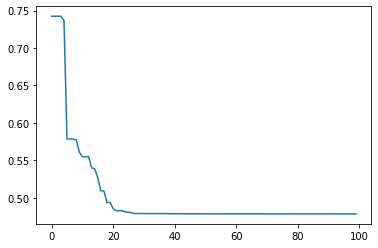

In [30]:
import matplotlib.pyplot as plt

print(f(result_pso.gbest_x))
print(g(result_pso.gbest_x))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)
print(result_pso.gbest_x)
pprint(result_pso)

plt.plot(result_pso.gbest_y_hist)
plt.show()

In [37]:
x_pso=np.array( [11.20833333,  2.20416667,  1.4221668,   7.54165016,  3.45,        7.2       ] )
f(x_pso)


opt_functions calculation at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]
f = [0.47836183], g = [7.97450127e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00] at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]


array([0.47836183])